In [1]:
%config Completer.use_jedi = False

In [63]:
import pandas as pd
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from imgaug import augmenters as iaa
import random

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [3]:
def getFileName(filePath):
    return filePath.split('\\')[-1]

In [4]:
path = 'simulation_data'

In [5]:
def importData(path):
    columns = ['Center','Left','Right','Steering','Throttle','Brake','Speed']
    data = pd.read_csv(os.path.join(path, 'driving_log.csv'),names = columns)
#     print(data.head())
#     print(data['Center'][0])
#     print(getFileName(data['Center'][0]))
    data['Center'] = data['Center'].apply(getFileName)
    print(data.head())
    print(data.shape[0])
    return data

In [6]:
data = importData('simulation_data/')

                               Center  \
0  center_2021_11_22_23_36_47_786.jpg   
1  center_2021_11_22_23_36_47_851.jpg   
2  center_2021_11_22_23_36_47_920.jpg   
3  center_2021_11_22_23_36_47_987.jpg   
4  center_2021_11_22_23_36_48_055.jpg   

                                                Left  \
0  F:\github\self_driving_car\simulation_data\IMG...   
1  F:\github\self_driving_car\simulation_data\IMG...   
2  F:\github\self_driving_car\simulation_data\IMG...   
3  F:\github\self_driving_car\simulation_data\IMG...   
4  F:\github\self_driving_car\simulation_data\IMG...   

                                               Right  Steering  Throttle  \
0  F:\github\self_driving_car\simulation_data\IMG...       0.0       0.0   
1  F:\github\self_driving_car\simulation_data\IMG...       0.0       0.0   
2  F:\github\self_driving_car\simulation_data\IMG...       0.0       0.0   
3  F:\github\self_driving_car\simulation_data\IMG...       0.0       0.0   
4  F:\github\self_driving_car\simula

In [7]:
data

,Center,Left,Right,Steering,Throttle,Brake,Speed
0,center_2021_11_22_23_36_47_786.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.000007
1,center_2021_11_22_23_36_47_851.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.000021
2,center_2021_11_22_23_36_47_920.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.000004
3,center_2021_11_22_23_36_47_987.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.000022
4,center_2021_11_22_23_36_48_055.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.000005
...,...,...,...,...,...,...,...
21058,center_2021_11_23_00_36_34_927.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.155977
21059,center_2021_11_23_00_36_34_998.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.156202
21060,center_2021_11_23_00_36_35_072.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.156501
21061,center_2021_11_23_00_36_35_145.jpg,F:\github\self_driving_car\simulation_data\IMG...,F:\github\self_driving_car\simulation_data\IMG...,0.0,0.0,0.0,0.156797


In [8]:
def balanceData(data, display=True):
    nBins = 21
    samplesPerBin = 3000
    hist, bins = np.histogram(data['Steering'], nBins)
#     print(bins)
    if display:
        center = (bins[:-1] + bins[1:]) * 0.5
    #     print(center)
        plt.bar(center, hist, width=0.06)
        plt.plot((-1,1),(samplesPerBin, samplesPerBin))
        plt.show()
        
    removeIndexList = []
    for j in range(nBins):
        binDataList = []
        for i in range(len(data['Steering'])):
            if data['Steering'][i] >= bins[j] and data['Steering'][i] <= bins[j+1]:
                binDataList.append(i)
        binDataList = shuffle(binDataList)
        binDataList = binDataList[samplesPerBin:]
        removeIndexList.extend(binDataList)
        
    print("Removed Images: ", len(removeIndexList))
    
    data.drop(data.index[removeIndexList], inplace=True)
    print('Remaining Images: ', len(data))
    
    if display:
        hist, _ = np.histogram(data['Steering'], nBins)
        plt.bar(center, hist, width=0.06)
        plt.plot((-1,1), (samplesPerBin, samplesPerBin))
        plt.show()
        
    return data

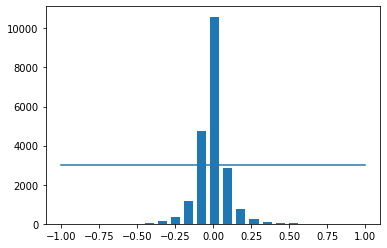

Removed Images:  9354
Remaining Images:  11709


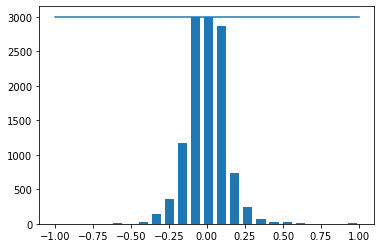

In [9]:
balanced_data = balanceData(data, display=True)

In [10]:
def loadData(path, data):
    imagesPath = []
    steering = []
    for i in range(len(data)):
        indexedData = data.iloc[i]
#         print(indexedData)
        imagesPath.append(os.path.join(path, 'IMG', indexedData[0]))
#         print(os.path.join(path, 'IMG', indexedData[0]))
        steering.append(float(indexedData[3]))
        
    imagesPath = np.asarray(imagesPath)
    steering = np.asarray(steering)
    
    return imagesPath, steering

In [11]:
imagesPath, steerings = loadData(path, balanced_data)

In [12]:
print(imagesPath[0], steerings[0])

simulation_data\IMG\center_2021_11_22_23_36_47_851.jpg 0.0


In [13]:
xTrain, xVal, yTrain, yVal = train_test_split(imagesPath, steerings, test_size=0.2, random_state=5)

In [14]:
print(xTrain.shape)
print(xVal.shape)
print(yTrain.shape)
print(yVal.shape)

(9367,)
(2342,)
(9367,)
(2342,)


In [41]:
def augmentImage(imagePath, steering):
    img = mpimg.imread(imagePath)
    #pan
    if np.random.rand() < 0.5:
        pan = iaa.Affine(translate_percent={'x':(-0.1,0.1),'y':(-0.1,0.1)})
        img = pan.augment_image(img)
    #zoom
    if np.random.rand() < 0.5:
        zoom = iaa.Affine(scale=(1,1.2))
        img = zoom.augment_image(img)
    #brightness
    if np.random.rand() < 0.5:
        brightness = iaa.Multiply((0.2,1.2))
        img = brightness.augment_image(img)
    #flip
    if np.random.rand() < 0.5:
        img = cv2.flip(img,1)
        steering = -steering
    
    return img, steering

In [42]:
imgR, stR = augmentImage('test.jpg',0)

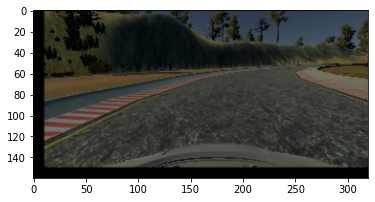

In [43]:
plt.imshow(imgR)
plt.show()

In [44]:
stR

0

In [59]:
def preProcessing(img):
    img = img[65:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.resize(img,(200,66))
    img = img/255.0
    return img

(160, 320, 3)


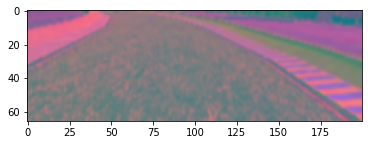

In [60]:
img = mpimg.imread('test.jpg')
print(img.shape)
img_new = preProcessing(img)
plt.imshow(img_new)
plt.show()

In [62]:
def batchGen(imgPath, steeringList, batchSize, trainFlag):
    while True:
        imgBatch = []
        steeringBatch = []
        
        for i in range(batchSize):
            index = random.randint(0, len(imgPath)-1)
            if trainFlag:
                img, steering = augmentImage(imgPath[index], steeringList[index])
            else:
                img = mpimg.imread(imgPath[index])
                steering = steeringList[index]
            img = preProcessing(img)
            imgBatch.append(img)
            steeringBatch.append(steering)
        yield(np.asarray(imgBatch), np.asarray(steeringBatch))
        

In [68]:
def create_model():
    model = Sequential()
    model.add(Conv2D(24, (5,5), (2,2), input_shape=(66,200,3), activation='elu'))
    model.add(Conv2D(36, (5,5), (2,2), activation='elu'))
    model.add(Conv2D(48, (5,5), (2,2), activation='elu'))
    model.add(Conv2D(64, (3,3), activation='elu'))
    model.add(Conv2D(64, (3,3), activation='elu'))
    
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))
    model.add(Dense(1))
    
    return model

In [69]:
model = create_model()

In [71]:
model.compile(Adam(learning_rate=0.0001), loss='mse')

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

In [80]:
EPOCHS = 50

In [81]:
history = model.fit(batchGen(xTrain, yTrain, 100, True), steps_per_epoch=300, epochs=EPOCHS, validation_data=batchGen(xVal, yVal, 100, False), validation_steps=20)

Epoch 1/50
300/300 [==============================] - 217s 725ms/step - loss: 0.0122 - val_loss: 0.0091
Epoch 2/50
300/300 [==============================] - 99s 330ms/step - loss: 0.0111 - val_loss: 0.0103
Epoch 3/50
300/300 [==============================] - 77s 258ms/step - loss: 0.0107 - val_loss: 0.0088
Epoch 4/50
300/300 [==============================] - 80s 268ms/step - loss: 0.0106 - val_loss: 0.0069
Epoch 5/50
300/300 [==============================] - 74s 249ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 6/50
300/300 [==============================] - 78s 261ms/step - loss: 0.0096 - val_loss: 0.0060
Epoch 7/50
300/300 [==============================] - 80s 266ms/step - loss: 0.0091 - val_loss: 0.0099
Epoch 8/50
300/300 [==============================] - 75s 251ms/step - loss: 0.0087 - val_loss: 0.0097
Epoch 9/50
300/300 [==============================] - 80s 268ms/step - loss: 0.0082 - val_loss: 0.0063
Epoch 10/50
300/300 [==============================] - 75s 249ms/step - 

In [82]:
model.save('model.h5')

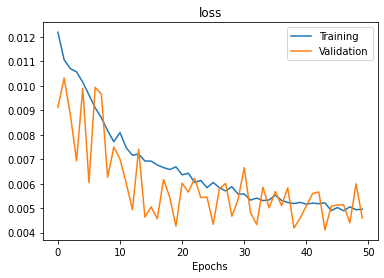

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('loss')
plt.xlabel('Epochs')
plt.show()

In [2]:
print('Setting UP')
import os
# os.environ&amp;#91;'TF_CPP_MIN_LOG_LEVEL'] = '3'
import socketio
import eventlet
import numpy as np
from flask import Flask
from tensorflow.keras.models import load_model
import base64
from io import BytesIO
from PIL import Image
import cv2

Setting UP


In [ ]:
#### FOR REAL TIME COMMUNICATION BETWEEN CLIENT AND SERVER
sio = socketio.Server()
#### FLASK IS A MICRO WEB FRAMEWORK WRITTEN IN PYTHON
app = Flask(__name__)  # '__main__'
 
maxSpeed = 10
 
 
def preProcess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
 
 
@sio.on('telemetry')
def telemetry(sid, data):
    speed = float(data['speed'])
    image = Image.open(BytesIO(base64.b64decode(data['image'])))
    image = np.asarray(image)
    image = preProcess(image)
    image = np.array([image])
    steering = float(model.predict(image))
    throttle = 1.0 - speed / maxSpeed
    print(f'{steering}, {throttle}, {speed}')
    sendControl(steering, throttle)
 
 
@sio.on('connect')
def connect(sid, environ):
    print('Connected')
    sendControl(0, 0)
 
 
def sendControl(steering, throttle):
    sio.emit('steer', data={
        'steering_angle': steering.__str__(),
        'throttle': throttle.__str__()
    })
 
 
if __name__ == '__main__':
    model = load_model('model.h5')
    app = socketio.Middleware(sio, app)
    ### LISTEN TO PORT 4567
    eventlet.wsgi.server(eventlet.listen(('', 4567)), app)

(17176) wsgi starting up on http://0.0.0.0:4567
(17176) accepted ('127.0.0.1', 56419)


Connected
-0.026972439140081406, 1.0, 0.0
-0.026972439140081406, 1.0, 0.0
-0.026748016476631165, 1.0, 0.0
-0.026869069784879684, 1.0, 0.0
-0.0271771177649498, 0.91178, 0.8822
-0.028398167341947556, 0.8165899999999999, 1.8341
-0.028556067496538162, 0.74551, 2.5449
-0.02852218598127365, 0.65072, 3.4928
-0.02711479365825653, 0.56501, 4.3499
-0.028634969145059586, 0.47195, 5.2805
-0.024929650127887726, 0.4210499999999999, 5.7895
-0.026187743991613388, 0.36233000000000004, 6.3767
-0.025198962539434433, 0.31237000000000004, 6.8763
-0.023251667618751526, 0.26177000000000006, 7.3823
-0.027581345289945602, 0.2267, 7.733
-0.029941584914922714, 0.19755, 8.0245
-0.02878051996231079, 0.17353000000000007, 8.2647
-0.025649432092905045, 0.15922000000000003, 8.4078
-0.02156534418463707, 0.14390000000000003, 8.561
-0.02543283998966217, 0.13157999999999992, 8.6842
-0.025722216814756393, 0.11953999999999998, 8.8046
-0.024273265153169632, 0.11158999999999997, 8.8841
-0.021632522344589233, 0.105139999999999

In [90]:
!python drive.py model.h5

You are using Keras version  b'2.5.0' , but the model was built using  2.5.0

2021-11-23 15:33:10.158679: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-11-23 15:33:14.056272: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-11-23 15:33:14.096322: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1660 Ti computeCapability: 7.5
coreClock: 1.59GHz coreCount: 24 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 268.26GiB/s
2021-11-23 15:33:14.096400: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-11-23 15:33:14.107342: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublas64_11.dll
2021-11-23 15:33:14.107379: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublasLt64_11.d


NOT RECORDING THIS RUN ...


Traceback (most recent call last):
  File "drive.py", line 139, in <module>
    eventlet.wsgi.server(eventlet.listen(('', 4567)), app)
  File "C:\Users\nkele\.conda\envs\tfgpu\lib\site-packages\eventlet\convenience.py", line 78, in listen
    sock.bind(addr)
OSError: [WinError 10048] Only one usage of each socket address (protocol/network address/port) is normally permitted
